In [1]:
#Import library yang dibutuhkan
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

In [2]:
#Generate our datasets
steam = pd.read_csv("steam_games.csv")

In [3]:
steam

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [4]:
#Menghapus Nan pada dataset
##Mencari apakah ada null pada datasets##

In [5]:
steam.isnull().values.any()

True

In [6]:
#Mencari null pada setiap kolom pada data set
steam.isnull().any()

url                         False
types                        True
name                         True
desc_snippet                 True
recent_reviews               True
all_reviews                  True
release_date                 True
developer                    True
publisher                    True
popular_tags                 True
game_details                 True
languages                    True
achievements                 True
genre                        True
game_description             True
mature_content               True
minimum_requirements         True
recommended_requirements     True
original_price               True
discount_price               True
dtype: bool

In [7]:
#menghitung jumlah null
print("NULL :")
steam.isnull().sum()

NULL :


url                             0
types                           2
name                           16
desc_snippet                13221
recent_reviews              38127
all_reviews                 12363
release_date                 3179
developer                     343
publisher                    5100
popular_tags                 2945
game_details                  520
languages                      36
achievements                28639
genre                         438
game_description             2913
mature_content              37936
minimum_requirements        19764
recommended_requirements    19758
original_price               5311
discount_price              26290
dtype: int64

In [8]:
# Menghilangkan NaN
steam.dropna(subset=["original_price"], inplace=True)
steam["desc_snippet"] = steam["desc_snippet"].fillna("No Description Snippet")
steam["recent_reviews"] = steam["recent_reviews"].fillna(0)
steam["types"] = steam["types"].fillna("no")
steam["release_date"] = steam["release_date"].fillna(0)
steam["developer"] = steam["developer"].fillna("no developers")
steam["publisher"] = steam["publisher"].fillna("no publisher")
steam["popular_tags"] = steam["popular_tags"].fillna(0)
steam["game_details"] = steam["game_details"].fillna("no")
steam["languages"] = steam["languages"].fillna("no languages")
steam["achievements"] = steam["achievements"].fillna(0)
steam["genre"] = steam["genre"].fillna("no genre")
steam["game_description"] = steam["game_description"].fillna("no game description")
steam["mature_content"] = steam["mature_content"].fillna("no mature content")
steam["minimum_requirements"] = steam["minimum_requirements"].fillna("no minimum requirements")
steam["recommended_requirements"] = steam["recommended_requirements"].fillna("no recommended requirements")
steam.dropna(subset=["all_reviews"], inplace=True)
steam["discount_price"] = steam["discount_price"].fillna(0)


In [9]:
print("NULL :")
steam.isnull().sum()

NULL :


url                         0
types                       0
name                        0
desc_snippet                0
recent_reviews              0
all_reviews                 0
release_date                0
developer                   0
publisher                   0
popular_tags                0
game_details                0
languages                   0
achievements                0
genre                       0
game_description            0
mature_content              0
minimum_requirements        0
recommended_requirements    0
original_price              0
discount_price              0
dtype: int64

In [10]:
#Preprocessing Lower Casing
steam = steam.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
#Dikarenakan terdapat harga yang berbentuk string maka kata dalam string tsb akan dirubah menjadi angka agar dapat diubah 
#menjadi float
colstocheck = steam["original_price"]
steam["original_price"]=steam["original_price"].replace({'\$':''},regex = True)
steam["original_price"]=steam["original_price"].replace({"o":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"e":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"免":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"试":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"a":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"i":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"u":0},regex = True)
steam["original_price"]=steam["original_price"].replace({"-":0},regex = True)

steam["all_reviews"]=steam["all_reviews"].replace({"need":0},regex = True)

In [12]:
##MENGUBAH KOLOM HARGA MENJADI FLOAT
steam["orginial_price"] = pd.to_numeric(steam["original_price"], downcast="float")


In [13]:
#Preprocessing all_reviews mengambil angka persenan saja

steam["all_reviews"][1:200]

1      mixed,(836,608),- 49% of the 836,608 user revi...
2      mostly positive,(7,030),- 71% of the 7,030 use...
3      mixed,(167,115),- 61% of the 167,115 user revi...
4      mostly positive,(11,481),- 74% of the 11,481 u...
6      very positive,(9,645),- 92% of the 9,645 user ...
                             ...                        
233    very positive,(14,567),- 89% of the 14,567 use...
234    mostly positive,(24,131),- 77% of the 24,131 u...
235    overwhelmingly positive,(63,149),- 97% of the ...
236    mixed,(4,174),- 57% of the 4,174 user reviews ...
238    very positive,(13,207),- 87% of the 13,207 use...
Name: all_reviews, Length: 199, dtype: object

In [14]:
steam["recent_reviews"]=steam["recent_reviews"].str.split("-",n=2,expand=True,)

In [15]:
steam["all_reviews"].str.split('%',1,expand=True,)

,0,1
0,"very positive,(42,550),- 92","of the 42,550 user reviews for this game are ..."
1,"mixed,(836,608),- 49","of the 836,608 user reviews for this game are..."
2,"mostly positive,(7,030),- 71","of the 7,030 user reviews for this game are p..."
3,"mixed,(167,115),- 61","of the 167,115 user reviews for this game are..."
4,"mostly positive,(11,481),- 74","of the 11,481 user reviews for this game are ..."
...,...,...
40611,"positive,(11),- 90",of the 11 user reviews for this game are posi...
40708,NaN,NaN
40728,"mostly positive,(10),- 70",of the 10 user reviews for this game are posi...
40799,NaN,NaN


In [16]:
#Preprocessing kolom all_reviews
steam['all_reviews']=steam["all_reviews"].str.split('-',1,expand=True,)[1]
steam['all_reviews']=steam["all_reviews"].str.split('%',1,expand=True,)
steam['all_reviews']=steam["all_reviews"].str.split('%',n=1,expand=True,)


In [17]:
print("Tabel ")
steam[["all_reviews","original_price"]]

Tabel 


,all_reviews,original_price
0,92,19.99
1,49,29.99
2,71,39.99
3,61,44.99
4,74,0
...,...,...
40611,90,7.99
40708,NaN,4.99
40728,70,9.99
40799,NaN,3.99


In [18]:
steam.dropna(subset=["all_reviews"], inplace=True)
steam.dropna(subset=["original_price"], inplace=True)
steam["all_reviews"] = pd.to_numeric(steam["all_reviews"], downcast="float")
steam["original_price"] = pd.to_numeric(steam["original_price"], downcast="float")

In [19]:
print("all_reviews :")
steam['all_reviews']

all_reviews :


0         92.0
1         49.0
2         71.0
3         61.0
4         74.0
         ...  
40557    100.0
40598     78.0
40611     90.0
40728     70.0
40811     28.0
Name: all_reviews, Length: 16989, dtype: float32

In [20]:
clustering=steam[["name","all_reviews","original_price"]]
clustering


,name,all_reviews,original_price
0,doom,92.0,19.990000
1,playerunknown's battlegrounds,49.0,29.990000
2,battletech,71.0,39.990002
3,dayz,61.0,44.990002
4,eve online,74.0,0.000000
...,...,...,...
40557,grabity,100.0,0.000000
40598,detached: non-vr edition,78.0,14.990000
40611,a room beyond,90.0,7.990000
40728,chasing the stars,70.0,9.990000


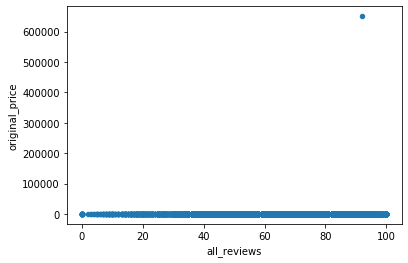

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(clustering,columns=['all_reviews','original_price'])
df.plot(x ='all_reviews', y='original_price', kind = 'scatter')
plt.show()

In [22]:
clustering.loc[(clustering['original_price'] >= 1000)]

,name,all_reviews,original_price
18639,slime-san: superslime edition,92.0,650560.0


In [23]:
clustering = clustering.drop(labels=[18639], axis=0)
df=clustering[["all_reviews","original_price"]]

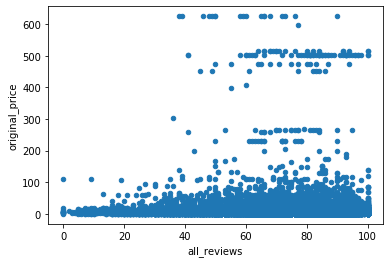

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(clustering,columns=['all_reviews','original_price'])
df.plot(x ='all_reviews', y='original_price', kind = 'scatter')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering[["all_reviews","original_price"]])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.698800e+04,1.698800e+04
mean,1.309420e-15,3.413586e-16
std,1.000029e+00,1.000029e+00
min,-4.031142e+00,-3.318565e-01
25%,-5.784406e-01,-2.662825e-01
50%,2.307862e-01,-1.785580e-01
75%,7.702707e-01,-3.108999e-03
max,1.363704e+00,1.336939e+01


In [26]:
from sklearn.cluster import KMeans
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
# inertia on the fitted data
kmeans.inertia_

8678.42071087561

Text(0, 0.5, 'Inertia')

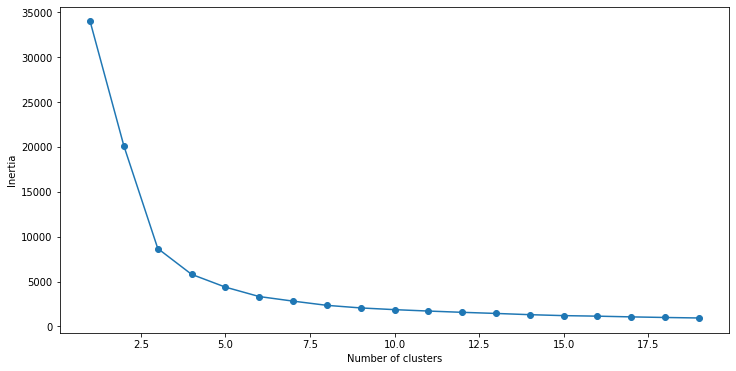

In [28]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [29]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [30]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    11649
1     5201
2      138
Name: cluster, dtype: int64

In [31]:
judul="""***Pembagian Clustering***
cluster 1 = [Harga(0 < 50 && review(0 < 70)]// [harga(50 < 100) && review (0 < 70)]
// [harga > 100 && review(70 < 80) ] = tidak worth it

cluster 2 = [harga (0 - 50) && review(60 < 80)] // [harga(50 < 100) && review (70 < 90)] // [harga(100 > ---) 
&& review (80 < 100)] = Cukup Worth It

cluster 3 = [harga (0 - 50) && review(80 < 10)] & [harga(50 < 100) && review (90 < 100)] = Sangat Worth It"""###
print(judul.title())

***Pembagian Clustering***
Cluster 1 = [Harga(0 < 50 && Review(0 < 70)]// [Harga(50 < 100) && Review (0 < 70)]
// [Harga > 100 && Review(70 < 80) ] = Tidak Worth It

Cluster 2 = [Harga (0 - 50) && Review(60 < 80)] // [Harga(50 < 100) && Review (70 < 90)] // [Harga(100 > ---) 
&& Review (80 < 100)] = Cukup Worth It

Cluster 3 = [Harga (0 - 50) && Review(80 < 10)] & [Harga(50 < 100) && Review (90 < 100)] = Sangat Worth It


In [32]:
from tkinter import *
root=Tk()
l1=Label(root,text="hello world",fg="red").pack()

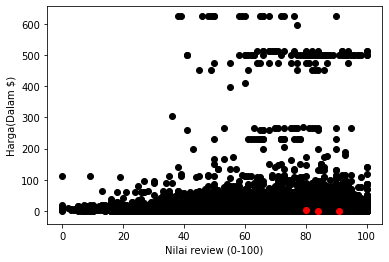

In [33]:
K=3

# Select random observation as centroids
Centroids = (clustering.sample(n=K))
plt.scatter(clustering["all_reviews"],clustering["original_price"],c='black')
plt.scatter(Centroids["all_reviews"],Centroids["original_price"],c='red')
plt.xlabel('Nilai review (0-100)')
plt.ylabel('Harga(Dalam $)')
plt.show()

In [34]:
diff = 1
j=0
import numpy as np
while(diff!=0):
    clusteringD=clustering
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in clusteringD.iterrows():
            d1=(row_c["all_reviews"]-row_d["all_reviews"])**2
            d2=(row_c["original_price"]-row_d["original_price"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        clustering[i]=ED
        i=i+1

    C=[]
    for index,row in clustering.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    clustering["Cluster"]=C
    Centroids_new = clustering.groupby(["Cluster"]).mean()[["original_price","all_reviews"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['original_price'] - Centroids['original_price']).sum() + (Centroids_new['all_reviews'] - Centroids['all_reviews']).sum()
        print(diff.sum())
    Centroids = clustering.groupby(["Cluster"]).mean()[["original_price","all_reviews"]]

-0.6813526
-1.1781702
4.8514404
44.44146
100.517296
140.42908
98.63519
15.207951
-1.2409792
-0.6423025
-0.30592632
-0.3423586
-0.2690649
0.012681007
0.0


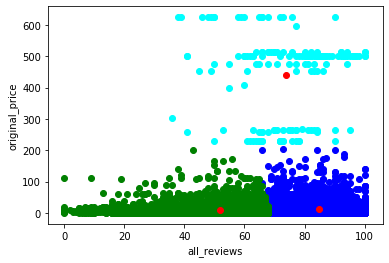

In [35]:

color=['blue','green','cyan']
for k in range(K):
    data=clustering[clustering["Cluster"]==k+1]
    plt.scatter(data["all_reviews"],data["original_price"],c=color[k])
plt.scatter(Centroids["all_reviews"],Centroids["original_price"],c='red')
plt.xlabel('all_reviews')
plt.ylabel('original_price')
plt.show()

In [36]:
print(c)

NameError: name 'c' is not defined

In [ ]:
diff = 1
j=0

while(diff!=0):
    clusteringD=clustering
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in clusteringD.iterrows():
            d1=(row_c["all_reviews"]-row_d["all_reviews"])**2
            d2=(row_c["original_price"]-row_d["original_price"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        clustering[i]=ED
        i=i+1

    C=[]
    for index,row in clustering.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    clustering["Cluster"]=C
    Centroids_new = clustering.groupby(["Cluster"]).mean()[["original_price","all_reviews"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['original_price'] - Centroids['original_price']).sum() + (Centroids_new['all_reviews'] - Centroids['all_reviews']).sum()
        print(diff.sum())
    Centroids = clustering.groupby(["Cluster"]).mean()[["original_price","all_reviews"]]

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=clustering[clustering["Cluster"]==k+1]
    plt.scatter(data["all_reviews"],data["original_price"],c=color[k])
plt.scatter(Centroids["all_reviews"],Centroids["original_price"],c='red')
plt.xlabel('all_reviews')
plt.ylabel('original_price')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = clustering["all_reviews"]
y = pd.DataFrame(np.random.rand(10,3), columns = list('original_price'))
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()